### Making an environment

D:\apps\Anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(


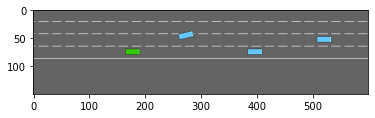

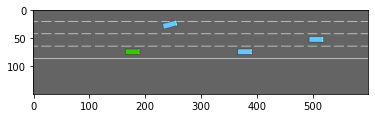

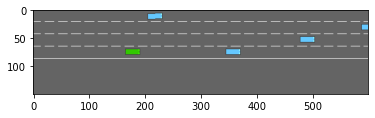

In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

    plt.imshow(env.render())
    plt.show()

In [3]:
env.action_type.actions_indexes

{'LANE_LEFT': 0, 'IDLE': 1, 'LANE_RIGHT': 2, 'FASTER': 3, 'SLOWER': 4}

### Configuring an environment

In [2]:
import pprint

env = gym.make("highway-v0", render_mode='rgb_array')
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


D:\apps\Anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


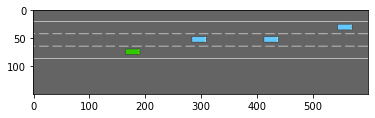

In [3]:
env.config["lanes_count"] = 3
env.reset()
plt.imshow(env.render())
plt.show()

### Training an agent

In [ ]:
!pip install protobuf==3.20.0

In [3]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
import time

t0=time.time()

env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="models/highway_dqn/")
model.learn(int(2e4))
model.save("models/highway_dqn/model")

print(f"train time: {time.time()-t0}")



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to models/highway_dqn/DQN_7
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4        |
|    time_elapsed     | 12       |
|    total_timesteps  | 55       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 8.97     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6        |
|    time_elapsed     | 15       |
|    total_timesteps  | 93       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 8.17     |
|    exploration_rate | 0.635    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 12       |
|    time_elapsed     | 60       |
|    total_timesteps  | 769      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.269    |
|    n_updates        | 568      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 8.17     |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 12       |
|    time_elapsed     | 63       |
|    total_timesteps  | 809      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.479    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 9.39     |
|    exploration_rate | 0.224    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 13       |
|    time_elapsed     | 118      |
|    total_timesteps  | 1634     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.219    |
|    n_updates        | 1433     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.186    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 13       |
|    time_elapsed     | 124      |
|    total_timesteps  | 1714     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.135    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 14       |
|    time_elapsed     | 191      |
|    total_timesteps  | 2715     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.191    |
|    n_updates        | 2514     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 14       |
|    time_elapsed     | 195      |
|    total_timesteps  | 2777     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.291    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 14       |
|    time_elapsed     | 259      |
|    total_timesteps  | 3657     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.37     |
|    n_updates        | 3456     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 14       |
|    time_elapsed     | 264      |
|    total_timesteps  | 3735     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.273    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 14       |
|    time_elapsed     | 331      |
|    total_timesteps  | 4688     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.138    |
|    n_updates        | 4487     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 14       |
|    time_elapsed     | 334      |
|    total_timesteps  | 4728     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0177   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 14       |
|    time_elapsed     | 409      |
|    total_timesteps  | 5791     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0796   |
|    n_updates        | 5590     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 14       |
|    time_elapsed     | 414      |
|    total_timesteps  | 5864     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0816   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 14       |
|    time_elapsed     | 496      |
|    total_timesteps  | 7023     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0124   |
|    n_updates        | 6822     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.1     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 14       |
|    time_elapsed     | 503      |
|    total_timesteps  | 7116     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.118    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 14       |
|    time_elapsed     | 594      |
|    total_timesteps  | 8404     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.178    |
|    n_updates        | 8203     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 17.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 14       |
|    time_elapsed     | 601      |
|    total_timesteps  | 8513     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.159    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 14       |
|    time_elapsed     | 696      |
|    total_timesteps  | 9858     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0155   |
|    n_updates        | 9657     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 14       |
|    time_elapsed     | 700      |
|    total_timesteps  | 9916     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.231    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 14       |
|    time_elapsed     | 786      |
|    total_timesteps  | 11129    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.118    |
|    n_updates        | 10928    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 14       |
|    time_elapsed     | 792      |
|    total_timesteps  | 11219    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.135    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 14       |
|    time_elapsed     | 889      |
|    total_timesteps  | 12593    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.136    |
|    n_updates        | 12392    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 14       |
|    time_elapsed     | 897      |
|    total_timesteps  | 12711    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0183   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 18.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 14       |
|    time_elapsed     | 988      |
|    total_timesteps  | 14001    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0207   |
|    n_updates        | 13800    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 18.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 780      |
|    fps              | 14       |
|    time_elapsed     | 996      |
|    total_timesteps  | 14104    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.109    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 14       |
|    time_elapsed     | 1091     |
|    total_timesteps  | 15449    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.101    |
|    n_updates        | 15248    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 18.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 14       |
|    time_elapsed     | 1096     |
|    total_timesteps  | 15525    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.105    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 904      |
|    fps              | 14       |
|    time_elapsed     | 1186     |
|    total_timesteps  | 16801    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.037    |
|    n_updates        | 16600    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 14       |
|    time_elapsed     | 1193     |
|    total_timesteps  | 16896    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.106    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 14       |
|    time_elapsed     | 1277     |
|    total_timesteps  | 18089    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0269   |
|    n_updates        | 17888    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 14       |
|    time_elapsed     | 1282     |
|    total_timesteps  | 18158    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.123    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 14       |
|    time_elapsed     | 1366     |
|    total_timesteps  | 19340    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00934  |
|    n_updates        | 19139    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1036     |
|    fps              | 14       |
|    time_elapsed     | 1374     |
|    total_timesteps  | 19460    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.174    |
|    n_updates      

In [1]:
# Load and test saved model
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
import time

# from matplotlib import pyplot as plt
# # %matplotlib inline
# %matplotlib

# plt.ion()
# plt.figure(1)


env = gym.make("highway-fast-v0", render_mode='rgb_array')
# env = gym.make("highway-v0", render_mode='rgb_array')
model = DQN.load("models/highway_dqn/model")

k=0
while True:
    done = truncated = False
    obs, info = env.reset()
    k+=1
    print(f"---k: {k} ---")
    j=0
    while not (done or truncated):
        j+=1
#         print(f"---j: {j} ---")
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        env.render()
#         time.sleep(0.05)
#         plt.imshow(env.render())
# #         plt.show()
#         plt.draw()
#         plt.pause(0.05)

---k: 1 ---
---k: 2 ---
---k: 3 ---
---k: 4 ---
---k: 5 ---
---k: 6 ---
---k: 7 ---
---k: 8 ---
---k: 9 ---
---k: 10 ---
---k: 11 ---
---k: 12 ---
---k: 13 ---
---k: 14 ---
---k: 15 ---
---k: 16 ---
---k: 17 ---
---k: 18 ---
---k: 19 ---
---k: 20 ---
---k: 21 ---
---k: 22 ---
---k: 23 ---
---k: 24 ---
---k: 25 ---
---k: 26 ---
---k: 27 ---
---k: 28 ---
---k: 29 ---
---k: 30 ---
---k: 31 ---
---k: 32 ---
---k: 33 ---
---k: 34 ---
---k: 35 ---
---k: 36 ---
---k: 37 ---
---k: 38 ---
---k: 39 ---
---k: 40 ---
---k: 41 ---
---k: 42 ---
---k: 43 ---
---k: 44 ---
---k: 45 ---
---k: 46 ---
---k: 47 ---
---k: 48 ---
---k: 49 ---
---k: 50 ---
---k: 51 ---
---k: 52 ---
---k: 53 ---
---k: 54 ---
---k: 55 ---
---k: 56 ---
---k: 57 ---


KeyboardInterrupt: 

In [1]:
from stable_baselines3 import PPO

In [2]:
PPO??

In [6]:
import gymnasium as gym
import highway_env
from stable_baselines3 import PPO
import time

t0=time.time()

env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = PPO('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              n_steps=2048,
              n_epochs=10,
              batch_size=32,
              gamma=0.8,
              gae_lambda=0.95,
              clip_range=0.2,
              verbose=1,
              tensorboard_log="models/highway_ppo/")
model.learn(int(2e4))
model.save("models/highway_ppo/model")

print(f"train time: {time.time()-t0}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to models/highway_ppo/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.1     |
|    ep_rew_mean     | 8.96     |
| time/              |          |
|    fps             | 15       |
|    iterations      | 1        |
|    time_elapsed    | 133      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.1        |
|    ep_rew_mean          | 10.4        |
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 2           |
|    time_elapsed         | 270         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017628271 |
|    clip_fraction        | 0.243       |
|    clip_range          

train time: 1356.4940605163574


In [6]:
DQN.load??

In [ ]:
# Load and test saved model
import gymnasium as gym
import highway_env
from stable_baselines3 import PPO
import time

# from matplotlib import pyplot as plt
# # %matplotlib inline
# %matplotlib

# plt.ion()
# plt.figure(1)


env = gym.make("highway-fast-v0", render_mode='rgb_array')
# env = gym.make("highway-v0", render_mode='rgb_array')
model = PPO.load("models/highway_ppo/model")

k=0
while True:
    done = truncated = False
    obs, info = env.reset()
    k+=1
    print(f"---k: {k} ---")
    j=0
    while not (done or truncated):
        j+=1
#         print(f"---j: {j} ---")
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        env.render()
#         time.sleep(0.05)
        
#         plt.imshow(env.render())
#         plt.show()
#         plt.draw()
#         plt.pause(0.1)

---k: 1 ---
---k: 2 ---
---k: 3 ---
---k: 4 ---
---k: 5 ---


In [2]:
model.learn??

Object `model.learn` not found.


### parking

In [1]:
import gymnasium as gym
import highway_env
import numpy as np

from stable_baselines3 import HerReplayBuffer, SAC, DDPG, TD3
from stable_baselines3.common.noise import NormalActionNoise
import time

t0=time.time()

env = gym.make("parking-v0")

# Create 4 artificial transitions per real transition
n_sampled_goal = 4

# SAC hyperparams:
model = SAC(
    "MultiInputPolicy",
    env,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
      n_sampled_goal=n_sampled_goal,
      goal_selection_strategy="future",
    ),
    verbose=1,
    buffer_size=int(1e5),
    learning_rate=1e-3,
    gamma=0.9,
    batch_size=256,
    policy_kwargs=dict(net_arch=[256, 256, 256]),
)

model.learn(int(5e4))
model.save("models/her_sac_highway")

print(f"train time: {time.time()-t0}")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


D:\apps\Anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.compute_reward to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.compute_reward` for environment variables or `env.get_wrapper_attr('compute_reward')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 104      |
|    ep_rew_mean     | -44      |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 4        |
|    fps             | 29       |
|    time_elapsed    | 13       |
|    total_timesteps | 414      |
| train/             |          |
|    actor_loss      | -2.28    |
|    critic_loss     | 0.0336   |
|    ent_coef        | 0.732    |
|    ent_coef_loss   | -1.05    |
|    learning_rate   | 0.001    |
|    n_updates       | 313      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.8     |
|    ep_rew_mean     | -40.4    |
|    success_rate    | 0        |
| time/              |          |
|    episodes        | 8        |
|    fps             | 28       |
|    time_elapsed    | 24       |
|    total_timesteps | 710      |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 207      |
|    ep_rew_mean     | -77.1    |
|    success_rate    | 0.0167   |
| time/              |          |
|    episodes        | 60       |
|    fps             | 26       |
|    time_elapsed    | 462      |
|    total_timesteps | 12434    |
| train/             |          |
|    actor_loss      | 1.35     |
|    critic_loss     | 0.00207  |
|    ent_coef        | 0.00169  |
|    ent_coef_loss   | -1.11    |
|    learning_rate   | 0.001    |
|    n_updates       | 12333    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 204      |
|    ep_rew_mean     | -75.1    |
|    success_rate    | 0.0156   |
| time/              |          |
|    episodes        | 64       |
|    fps             | 26       |
|    time_elapsed    | 486      |
|    total_timesteps | 13084    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 204      |
|    ep_rew_mean     | -61.1    |
|    success_rate    | 0.15     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 26       |
|    time_elapsed    | 823      |
|    total_timesteps | 21956    |
| train/             |          |
|    actor_loss      | 1.12     |
|    critic_loss     | 0.0018   |
|    ent_coef        | 0.00174  |
|    ent_coef_loss   | 0.0718   |
|    learning_rate   | 0.001    |
|    n_updates       | 21855    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 205      |
|    ep_rew_mean     | -59.1    |
|    success_rate    | 0.18     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 26       |
|    time_elapsed    | 850      |
|    total_timesteps | 22655    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 166      |
|    ep_rew_mean     | -33.7    |
|    success_rate    | 0.42     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 25       |
|    time_elapsed    | 1189     |
|    total_timesteps | 30774    |
| train/             |          |
|    actor_loss      | 1.14     |
|    critic_loss     | 0.00288  |
|    ent_coef        | 0.00156  |
|    ent_coef_loss   | 0.59     |
|    learning_rate   | 0.001    |
|    n_updates       | 30673    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 166      |
|    ep_rew_mean     | -33.6    |
|    success_rate    | 0.43     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 25       |
|    time_elapsed    | 1195     |
|    total_timesteps | 30903    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 106      |
|    ep_rew_mean     | -22.9    |
|    success_rate    | 0.59     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 25       |
|    time_elapsed    | 1349     |
|    total_timesteps | 34502    |
| train/             |          |
|    actor_loss      | 0.963    |
|    critic_loss     | 0.00152  |
|    ent_coef        | 0.00162  |
|    ent_coef_loss   | -2.04    |
|    learning_rate   | 0.001    |
|    n_updates       | 34401    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 102      |
|    ep_rew_mean     | -21.9    |
|    success_rate    | 0.6      |
| time/              |          |
|    episodes        | 232      |
|    fps             | 25       |
|    time_elapsed    | 1356     |
|    total_timesteps | 34675    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 75.4     |
|    ep_rew_mean     | -17.5    |
|    success_rate    | 0.73     |
| time/              |          |
|    episodes        | 284      |
|    fps             | 25       |
|    time_elapsed    | 1567     |
|    total_timesteps | 39579    |
| train/             |          |
|    actor_loss      | 1.12     |
|    critic_loss     | 0.00183  |
|    ent_coef        | 0.00149  |
|    ent_coef_loss   | 1.76     |
|    learning_rate   | 0.001    |
|    n_updates       | 39478    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 75.4     |
|    ep_rew_mean     | -17.4    |
|    success_rate    | 0.74     |
| time/              |          |
|    episodes        | 288      |
|    fps             | 25       |
|    time_elapsed    | 1570     |
|    total_timesteps | 39663    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 70.8     |
|    ep_rew_mean     | -15.7    |
|    success_rate    | 0.84     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 25       |
|    time_elapsed    | 1706     |
|    total_timesteps | 42812    |
| train/             |          |
|    actor_loss      | 1.15     |
|    critic_loss     | 0.0016   |
|    ent_coef        | 0.00185  |
|    ent_coef_loss   | -0.331   |
|    learning_rate   | 0.001    |
|    n_updates       | 42711    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 76.4     |
|    ep_rew_mean     | -16.3    |
|    success_rate    | 0.84     |
| time/              |          |
|    episodes        | 344      |
|    fps             | 25       |
|    time_elapsed    | 1735     |
|    total_timesteps | 43482    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50.9     |
|    ep_rew_mean     | -11.4    |
|    success_rate    | 0.9      |
| time/              |          |
|    episodes        | 396      |
|    fps             | 24       |
|    time_elapsed    | 1822     |
|    total_timesteps | 45478    |
| train/             |          |
|    actor_loss      | 0.957    |
|    critic_loss     | 0.00294  |
|    ent_coef        | 0.0019   |
|    ent_coef_loss   | -0.848   |
|    learning_rate   | 0.001    |
|    n_updates       | 45377    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.4     |
|    ep_rew_mean     | -10.9    |
|    success_rate    | 0.91     |
| time/              |          |
|    episodes        | 400      |
|    fps             | 24       |
|    time_elapsed    | 1826     |
|    total_timesteps | 45577    |
| train/             |          |
|    actor_los

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.1     |
|    ep_rew_mean     | -9.86    |
|    success_rate    | 0.91     |
| time/              |          |
|    episodes        | 452      |
|    fps             | 24       |
|    time_elapsed    | 1903     |
|    total_timesteps | 47350    |
| train/             |          |
|    actor_loss      | 0.901    |
|    critic_loss     | 0.000958 |
|    ent_coef        | 0.0019   |
|    ent_coef_loss   | -1.14    |
|    learning_rate   | 0.001    |
|    n_updates       | 47249    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 32       |
|    ep_rew_mean     | -9.09    |
|    success_rate    | 0.92     |
| time/              |          |
|    episodes        | 456      |
|    fps             | 24       |
|    time_elapsed    | 1906     |
|    total_timesteps | 47420    |
| train/             |          |
|    actor_los

train time: 2020.0782492160797


In [5]:
# Load saved model
# Because it needs access to `env.compute_reward()`
# HER must be loaded with the env
import gymnasium as gym
from stable_baselines3 import HerReplayBuffer, SAC, DDPG, TD3

env = gym.make("parking-v0", render_mode="human") # Change the render mode
model = SAC.load("models/her_sac_highway", env=env)

obs, info = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    
    episode_reward += reward
    if terminated or truncated or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs, info = env.reset()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Reward: -9.399274214062538 Success? True
Reward: -2.5906504660936376 Success? True
Reward: -13.257298276409003 Success? False
Reward: -11.668227902548322 Success? True


### Training a RL agent on Atari games

In [7]:
make_atari_env??

#### Pong

In [3]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C
import time

t0=time.time()

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
vec_env = make_atari_env("PongNoFrameskip-v4", n_envs=4, seed=0)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(vec_env, n_stack=4)

model = A2C("CnnPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25_000)
model.save("models/Pong")

print(f"train time: {time.time()-t0}")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render("human")

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 211      |
|    iterations         | 100      |
|    time_elapsed       | 9        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.77    |
|    explained_variance | -0.024   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0368   |
|    value_loss         | 0.000496 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 3.44e+03 |
|    ep_rew_mean        | -20.8    |
| time/                 |          |
|    fps                | 221      |
|    iterations         | 200      |
|    time_elapsed       | 18       |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -1.77    |
|    explained_v

KeyboardInterrupt: 

#### Breakout

In [2]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C
import time

t0=time.time()

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
# vec_env = make_atari_env("PongNoFrameskip-v4", n_envs=4, seed=0)
vec_env = make_atari_env("BreakoutNoFrameskip-v4", n_envs=4, seed=0)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(vec_env, n_stack=4)

model = A2C("CnnPolicy", vec_env, verbose=1)
model.learn(total_timesteps=50_000)
model.save("models/Breakout")

print(f"train time: {time.time()-t0}")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render("human")
    

Using cuda device
Wrapping the env in a VecTransposeImage.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 885      |
|    ep_rew_mean        | 2.38     |
| time/                 |          |
|    fps                | 218      |
|    iterations         | 100      |
|    time_elapsed       | 9        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.39    |
|    explained_variance | -0.0524  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0664  |
|    value_loss         | 0.00997  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 901      |
|    ep_rew_mean        | 2.65     |
| time/                 |          |
|    fps                | 244      |
|    iterations         | 200      |
|    time_elapsed       | 16       |
|    total_times

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 707      |
|    ep_rew_mean        | 1.17     |
| time/                 |          |
|    fps                | 280      |
|    iterations         | 1400     |
|    time_elapsed       | 99       |
|    total_timesteps    | 28000    |
| train/                |          |
|    entropy_loss       | -1.37    |
|    explained_variance | -5.85    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.067   |
|    value_loss         | 0.00819  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 711      |
|    ep_rew_mean        | 1.23     |
| time/                 |          |
|    fps                | 280      |
|    iterations         | 1500     |
|    time_elapsed       | 106      |
|    total_timesteps    | 30000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 913      |
|    ep_rew_mean        | 2.75     |
| time/                 |          |
|    fps                | 286      |
|    iterations         | 2800     |
|    time_elapsed       | 195      |
|    total_timesteps    | 56000    |
| train/                |          |
|    entropy_loss       | -1.19    |
|    explained_variance | 0.996    |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | -0.0084  |
|    value_loss         | 0.000767 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 917      |
|    ep_rew_mean        | 2.74     |
| time/                 |          |
|    fps                | 286      |
|    iterations         | 2900     |
|    time_elapsed       | 202      |
|    total_timesteps    | 58000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 791      |
|    ep_rew_mean        | 1.89     |
| time/                 |          |
|    fps                | 292      |
|    iterations         | 4200     |
|    time_elapsed       | 287      |
|    total_timesteps    | 84000    |
| train/                |          |
|    entropy_loss       | -1.23    |
|    explained_variance | 0.999    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4199     |
|    policy_loss        | 0.00468  |
|    value_loss         | 0.000226 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 823      |
|    ep_rew_mean        | 2.1      |
| time/                 |          |
|    fps                | 292      |
|    iterations         | 4300     |
|    time_elapsed       | 293      |
|    total_timesteps    | 86000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 832      |
|    ep_rew_mean        | 2.15     |
| time/                 |          |
|    fps                | 295      |
|    iterations         | 5500     |
|    time_elapsed       | 372      |
|    total_timesteps    | 110000   |
| train/                |          |
|    entropy_loss       | -1.38    |
|    explained_variance | -2.11    |
|    learning_rate      | 0.0007   |
|    n_updates          | 5499     |
|    policy_loss        | -0.104   |
|    value_loss         | 0.0153   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 808      |
|    ep_rew_mean        | 2.03     |
| time/                 |          |
|    fps                | 295      |
|    iterations         | 5600     |
|    time_elapsed       | 379      |
|    total_timesteps    | 112000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 950      |
|    ep_rew_mean        | 2.89     |
| time/                 |          |
|    fps                | 297      |
|    iterations         | 6900     |
|    time_elapsed       | 464      |
|    total_timesteps    | 138000   |
| train/                |          |
|    entropy_loss       | -1.05    |
|    explained_variance | 0.97     |
|    learning_rate      | 0.0007   |
|    n_updates          | 6899     |
|    policy_loss        | 0.0311   |
|    value_loss         | 0.00331  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 940      |
|    ep_rew_mean        | 2.83     |
| time/                 |          |
|    fps                | 297      |
|    iterations         | 7000     |
|    time_elapsed       | 470      |
|    total_timesteps    | 140000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.01e+03 |
|    ep_rew_mean        | 3.51     |
| time/                 |          |
|    fps                | 298      |
|    iterations         | 8300     |
|    time_elapsed       | 555      |
|    total_timesteps    | 166000   |
| train/                |          |
|    entropy_loss       | -0.952   |
|    explained_variance | 0.968    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8299     |
|    policy_loss        | 0.0577   |
|    value_loss         | 0.0108   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | 3.49     |
| time/                 |          |
|    fps                | 298      |
|    iterations         | 8400     |
|    time_elapsed       | 562      |
|    total_timesteps    | 168000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.13e+03 |
|    ep_rew_mean        | 4.21     |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 9600     |
|    time_elapsed       | 642      |
|    total_timesteps    | 192000   |
| train/                |          |
|    entropy_loss       | -0.836   |
|    explained_variance | 0.773    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9599     |
|    policy_loss        | 0.0643   |
|    value_loss         | 0.0233   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.16e+03 |
|    ep_rew_mean        | 4.4      |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 9700     |
|    time_elapsed       | 648      |
|    total_timesteps    | 194000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.14e+03 |
|    ep_rew_mean        | 4.77     |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 10900    |
|    time_elapsed       | 728      |
|    total_timesteps    | 218000   |
| train/                |          |
|    entropy_loss       | -0.433   |
|    explained_variance | 0.198    |
|    learning_rate      | 0.0007   |
|    n_updates          | 10899    |
|    policy_loss        | 0.258    |
|    value_loss         | 0.113    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.14e+03 |
|    ep_rew_mean        | 4.81     |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 11000    |
|    time_elapsed       | 734      |
|    total_timesteps    | 220000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.54e+03 |
|    ep_rew_mean        | 8.08     |
| time/                 |          |
|    fps                | 300      |
|    iterations         | 12300    |
|    time_elapsed       | 818      |
|    total_timesteps    | 246000   |
| train/                |          |
|    entropy_loss       | -0.512   |
|    explained_variance | 0.861    |
|    learning_rate      | 0.0007   |
|    n_updates          | 12299    |
|    policy_loss        | 0.0402   |
|    value_loss         | 0.0218   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.57e+03 |
|    ep_rew_mean        | 8.38     |
| time/                 |          |
|    fps                | 300      |
|    iterations         | 12400    |
|    time_elapsed       | 825      |
|    total_timesteps    | 248000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.17e+03 |
|    ep_rew_mean        | 5.34     |
| time/                 |          |
|    fps                | 300      |
|    iterations         | 13600    |
|    time_elapsed       | 903      |
|    total_timesteps    | 272000   |
| train/                |          |
|    entropy_loss       | -0.353   |
|    explained_variance | 0.86     |
|    learning_rate      | 0.0007   |
|    n_updates          | 13599    |
|    policy_loss        | -0.00813 |
|    value_loss         | 0.0201   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.15e+03 |
|    ep_rew_mean        | 5.19     |
| time/                 |          |
|    fps                | 301      |
|    iterations         | 13700    |
|    time_elapsed       | 910      |
|    total_timesteps    | 274000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.47e+03 |
|    ep_rew_mean        | 8        |
| time/                 |          |
|    fps                | 301      |
|    iterations         | 15000    |
|    time_elapsed       | 995      |
|    total_timesteps    | 300000   |
| train/                |          |
|    entropy_loss       | -0.195   |
|    explained_variance | 0.729    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14999    |
|    policy_loss        | -0.00747 |
|    value_loss         | 0.0101   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.52e+03 |
|    ep_rew_mean        | 8.4      |
| time/                 |          |
|    fps                | 301      |
|    iterations         | 15100    |
|    time_elapsed       | 1001     |
|    total_timesteps    | 302000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.96e+03 |
|    ep_rew_mean        | 12.6     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 16400    |
|    time_elapsed       | 1086     |
|    total_timesteps    | 328000   |
| train/                |          |
|    entropy_loss       | -0.65    |
|    explained_variance | 0.811    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16399    |
|    policy_loss        | 0.0131   |
|    value_loss         | 0.0297   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.97e+03 |
|    ep_rew_mean        | 12.5     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 16500    |
|    time_elapsed       | 1092     |
|    total_timesteps    | 330000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.94e+03 |
|    ep_rew_mean        | 13.5     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 17800    |
|    time_elapsed       | 1176     |
|    total_timesteps    | 356000   |
| train/                |          |
|    entropy_loss       | -0.216   |
|    explained_variance | 0.758    |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | 0.00262  |
|    value_loss         | 0.0256   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.94e+03 |
|    ep_rew_mean        | 13.4     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 17900    |
|    time_elapsed       | 1183     |
|    total_timesteps    | 358000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.94e+03 |
|    ep_rew_mean        | 13.5     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 19100    |
|    time_elapsed       | 1262     |
|    total_timesteps    | 382000   |
| train/                |          |
|    entropy_loss       | -0.221   |
|    explained_variance | 0.877    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19099    |
|    policy_loss        | 0.128    |
|    value_loss         | 0.0614   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.9e+03  |
|    ep_rew_mean        | 13.1     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 19200    |
|    time_elapsed       | 1268     |
|    total_timesteps    | 384000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.13e+03 |
|    ep_rew_mean        | 14.6     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 20400    |
|    time_elapsed       | 1346     |
|    total_timesteps    | 408000   |
| train/                |          |
|    entropy_loss       | -0.174   |
|    explained_variance | 0.722    |
|    learning_rate      | 0.0007   |
|    n_updates          | 20399    |
|    policy_loss        | -0.0291  |
|    value_loss         | 0.0944   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.13e+03 |
|    ep_rew_mean        | 14.7     |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 20500    |
|    time_elapsed       | 1353     |
|    total_timesteps    | 410000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.18e+03 |
|    ep_rew_mean        | 14.6     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 21700    |
|    time_elapsed       | 1431     |
|    total_timesteps    | 434000   |
| train/                |          |
|    entropy_loss       | -0.0552  |
|    explained_variance | 0.77     |
|    learning_rate      | 0.0007   |
|    n_updates          | 21699    |
|    policy_loss        | -0.0139  |
|    value_loss         | 0.0239   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.22e+03 |
|    ep_rew_mean        | 14.7     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 21800    |
|    time_elapsed       | 1437     |
|    total_timesteps    | 436000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.37e+03 |
|    ep_rew_mean        | 15.7     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 23100    |
|    time_elapsed       | 1523     |
|    total_timesteps    | 462000   |
| train/                |          |
|    entropy_loss       | -0.122   |
|    explained_variance | -0.0244  |
|    learning_rate      | 0.0007   |
|    n_updates          | 23099    |
|    policy_loss        | -0.0109  |
|    value_loss         | 0.0256   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.37e+03 |
|    ep_rew_mean        | 15.6     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 23200    |
|    time_elapsed       | 1529     |
|    total_timesteps    | 464000   |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.29e+03 |
|    ep_rew_mean        | 14.8     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 24500    |
|    time_elapsed       | 1615     |
|    total_timesteps    | 490000   |
| train/                |          |
|    entropy_loss       | -0.0504  |
|    explained_variance | 0.0245   |
|    learning_rate      | 0.0007   |
|    n_updates          | 24499    |
|    policy_loss        | -0.00102 |
|    value_loss         | 0.0245   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.27e+03 |
|    ep_rew_mean        | 14.7     |
| time/                 |          |
|    fps                | 303      |
|    iterations         | 24600    |
|    time_elapsed       | 1622     |
|    total_timesteps    | 492000   |
| train/                |          |
|

D:\apps\Anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


KeyboardInterrupt: 

In [1]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3 import A2C

vec_env = make_atari_env("BreakoutNoFrameskip-v4", n_envs=4, seed=0)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(vec_env, n_stack=4)

model = A2C.load("models/Breakout", env=vec_env)

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render("human")
    

NameError: name 'VecFrameStack' is not defined

In [12]:
A2C.load??